#QIBA Digital Phantoms: Elastic Mesh Refinement
##Introduction
Bo (Mayo) compared our elastic simulation results between LS-DYNA and ABAQUS using the uniform mesh with 0.25 mm node spacing.  Those simulations matched well, but we want to make sure that the spectral content of the elastic simulations is not influenced by the mesh element density.  I have run all 48 cases using a 0.1 mm node spacing to compare with the 0.25 mm node spacing results.
##Methods
All of the relevant parameters of the simulation are delineated in this GitHub repository's README.md file.  This specific comparison is just using LS-DYNA as the solver.
##Results

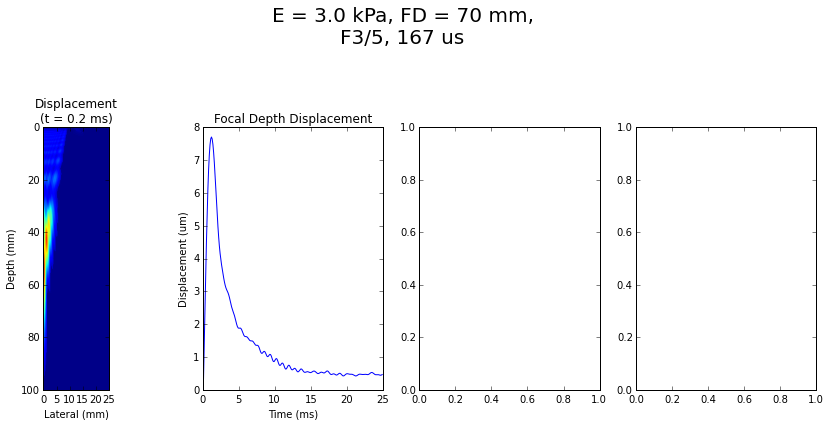

In [74]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

class resSim:
    """
    calculate vectors and metrics from res_sim.mat datasets for comparative analysis
    """
    def __init__(self, res_sim_mat_path):
        self.res_sim_mat_path = res_sim_mat_path
        load_res_sim()
        
    def load_res_sim(self):
        """
        load in axial (mm), lat (mm), t (s) and arfidata (um)
        """
        from scipy.io import loadmat
        self.res_sim = loadmat(self.res_sim_mat_path)
        self.extent = [self.res_sim['lat'].min(), 
                       self.res_sim['lat'].max(), 
                       self.res_sim['axial'].max(), 
                       self.res_sim['axial'].min()]
                

coarseFoc30mmF2p0_E30k_T334 = resSim('coarse/Foc30mmF2p0_E30k_T334.mat')
coarseFoc70mmF3p5_E3k_T167 = resSim('coarse/Foc70mmF3p5_E3k_T167.mat')
fineFoc30mmF2p0_E30k_T334 = resSim('fine/Foc30mmF2p0_E30k_T334.mat')
fineFoc70mmF3p5_E3k_T167 = resSim('fine/Foc70mmF3p5_E3k_T167.mat')

def genDispFFTplots(res_sim, ts, depth_mm):
    """
    Generate plots of displacement field and FFT spectrum at specified timestep
    """    
    fig, (ax1, ax2, ax3, ax4) =  plt.subplots(1, 4, figsize=(12, 6), dpi=100)
    fig.suptitle('E = 3.0 kPa, FD = 70 mm,\nF3/5, 167 us', fontsize = 20)
    
    ax1.imshow(res_sim['arfidata'][:, :, ts], extent = extent)
    ax1.set_title('Displacement\n(t = %.1f ms)' % (res_sim['t'][0, ts]*1e3))
    ax1.set_xlabel('Lateral (mm)')
    ax1.set_ylabel('Depth (mm)')
    
    depthIndex = np.where(res_sim['axial'] >= depth_mm)[1].min()
    ax2.plot(res_sim['t'][0]*1e3, res_sim['arfidata'][depthIndex, 0, :])
    ax2.set_title('Focal Depth Displacement')
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('Displacement (um)')
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.7)
                            
genDispFFTplots(coarseFoc70mmF3p5_E3k_T167, 2, 70)